# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import AgglomerativeClustering
import random

# Load the image into a numpy array

In [11]:
path_to_jpg_file = "sample.jpg"
img = mpimg.imread(path_to_jpg_file)

In [12]:
img.shape

(1000, 1600, 3)

In [13]:
img = img[:100,:100,:]

# Display the image

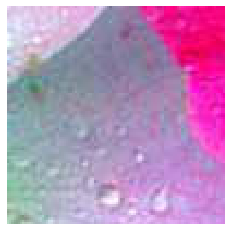

In [14]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image

In [15]:
pixels = img.reshape((-1,3))

In [16]:
pixels.shape

(10000, 3)

In [17]:
pixels[0]

array([241, 220, 251], dtype=uint8)

# Clustering for k=3

In [18]:
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters).fit(pixels)

### Determine label of each pixel

In [19]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = agglo.labels_ 

In [20]:
c.head(3)

,R,G,B,label
0,241,220,251,0
1,229,208,239,0
2,217,196,227,0


### Map each pixel to its center

In [21]:
centers_map_R = {i:agglo.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:agglo.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:agglo.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [22]:
c.head(3)

,R,G,B,label
0,241,220,251,0
1,229,208,239,0
2,217,196,227,0


### Plot the clustered image

In [ ]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Clustering for k=6

In [ ]:
n_clusters = 6
agglo = AgglomorativeClustering(n_clusters).fit(pixels)

### Determine label of each pixel

In [ ]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = agglo.labels_ 

In [ ]:
c.head(3)

### Map each pixel to its center

In [ ]:
centers_map_R = {i:agglo.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:agglo.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:agglo.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [ ]:
c.head(3)

### Plot the clustered image

In [ ]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Use the Elbow method to find the optimum k value for this image

In [ ]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    agglo = AgglomorativeClustering(k)
    agglo.fit(pixels)
    wcss.append(agglo.inertia_)
    
wcss

### Plot the number of clusters vs WCSS

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_range, wcss)
ax.set_xticks(k_range)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.xlim()
plt.show()

The plot demonstrates that k=6 is the optimum value